In [4]:
import pandas as pd

In [5]:
ratings = pd.read_csv('music_listening.csv', low_memory=False)

In [6]:
ratings.head()

,user,the beatles,radiohead,deathcab for cutie,coldplay,modest mouse,sufjan stevens,dylan. bob,red hot clili peppers,pink fluid,...,municipal waste,townes van zandt,curtis mayfield,jewel,lamb,michal w. smith,群星,agalloch,meshuggah,yellowcard
0,0,NaN,0.020417,NaN,NaN,NaN,NaN,NaN,0.030496,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,NaN,0.184962,0.024561,NaN,NaN,0.136341,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,NaN,NaN,0.028635,NaN,NaN,NaN,0.024559,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.043529,0.086281,0.034590,0.016712,0.015935,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
ratings = ratings.T
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
user,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
the beatles,NaN,NaN,NaN,NaN,0.043529,NaN,NaN,NaN,0.093398,0.017621,...,NaN,NaN,0.121169,0.038168,0.007939,0.017884,NaN,0.076923,NaN,NaN
radiohead,0.020417,0.184962,NaN,NaN,0.086281,0.006322,NaN,NaN,NaN,0.019156,...,0.017735,NaN,NaN,NaN,0.011187,NaN,NaN,NaN,NaN,NaN
deathcab for cutie,NaN,0.024561,0.028635,NaN,0.03459,NaN,NaN,NaN,NaN,0.013349,...,0.121344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027893
coldplay,NaN,NaN,NaN,NaN,0.016712,NaN,NaN,NaN,NaN,NaN,...,0.217175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Удаление строки user и кол-во оставшихся строк
ratings = ratings.drop('user', axis=0)
ratings.head()
print(f"Количество оставшихся строк: {ratings.shape[0]}")

Количество оставшихся строк: 1000


In [9]:
# заполнение пропусков 0
ratings = ratings.apply(pd.to_numeric, errors='coerce')
ratings = ratings.fillna(0)


In [10]:
from sklearn.preprocessing import normalize

# нормализация данных
ratings_normalized = normalize(ratings, axis=1)

In [11]:
from sklearn.cluster import KMeans

# Здесь должен быть ваш код
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(ratings_normalized)
clusters = kmeans.predict(ratings_normalized)

In [12]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.69981734e-03  0.00000000e+00  1.22820995e-04 ...  0.00000000e+00
  -4.33680869e-19 -2.16840434e-19]
 [ 1.81853896e-03  1.02845832e-04  7.80554376e-04 ...  3.34385322e-03
  -6.50521303e-19  1.15480329e-03]
 [ 3.42929358e-04  7.92403602e-04  1.67427467e-03 ...  1.53303597e-04
   4.97927880e-03  4.13457931e-04]
 [-1.30104261e-18  1.93958990e-03  1.90016082e-03 ...  8.24288270e-03
  -6.50521303e-19 -6.50521303e-19]
 [ 2.19491455e-03  1.74031096e-03  1.71791197e-03 ...  1.21773157e-04
   1.62096302e-03  3.47761449e-03]]


In [13]:
from scipy import spatial

# Вычисление расстояния между "the beatles" и "coldplay"
beatles_idx = ratings.index.get_loc('the beatles')
coldplay_idx = ratings.index.get_loc('coldplay')

beatles_vec = ratings_normalized[beatles_idx]
coldplay_vec = ratings_normalized[coldplay_idx]

distance = spatial.distance.cosine(beatles_vec, coldplay_vec)
print(f"Расстояние между 'the beatles' и 'coldplay': {round(distance, 2)}")

Расстояние между 'the beatles' и 'coldplay': 0.9


In [14]:
def pClosest(points, pt, K=10):
    ind = [i[0] for i in sorted(enumerate(points), key=lambda x: spatial.distance.cosine(x[1], pt))]
    return ind[:K]

In [15]:
from scipy import spatial
# Получаем названия исполнителей (индексы DataFrame)
artist_names = ratings.index

# Для каждого кластера находим топ-10 ближайших исполнителей к центроиду
for cluster_id in range(len(centroids)):
    print(f"Кластер {cluster_id + 1} ")

    closest_indices = pClosest(ratings_normalized, centroids[cluster_id], K=10)
    top_artists = [artist_names[i] for i in closest_indices]

    print("Топ-10 исполнителей:")
    for i, artist in enumerate(top_artists, 1):
        print(f"{i}. {artist}")

Кластер 1 
Топ-10 исполнителей:
1. nas
2. jay-z
3. kanye west
4. the notorious b.i.g.
5. lupe the gorilla
6. a tribe called quest
7. the roots featuring d'angelo
8. gangstarr
9. little brother
10. murs and 9th wonder
Кластер 2 
Топ-10 исполнителей:
1. fall out boy
2. the all-americian rejects
3. paramore
4. kelly clarkson
5. john mayer
6. the fray
7. maroon5
8. dashboard confesssional
9. coldplay
10. somethings corporate
Кластер 3 
Топ-10 исполнителей:
1. brand new
2. blink-182
3. alkaline trio
4. against me!
5. descendents
6. underoath
7. less than jake
8. new found glory
9. thrice
10. thursday
Кластер 4 
Топ-10 исполнителей:
1. the beatles
2. the rolling stones
3. dylan. bob
4. who
5. led zeppelin.
6. miles davis.
7. simon and garfunkel
8. pink fluid
9. young. neil
10. eric clapton
Кластер 5 
Топ-10 исполнителей:
1. radiohead
2. the arcade fire
3. the shins
4. sufjan stevens
5. belle and sebastian
6. broken social scene
7. the pixies
8. animal collective
9. modest mouse
10. spoon


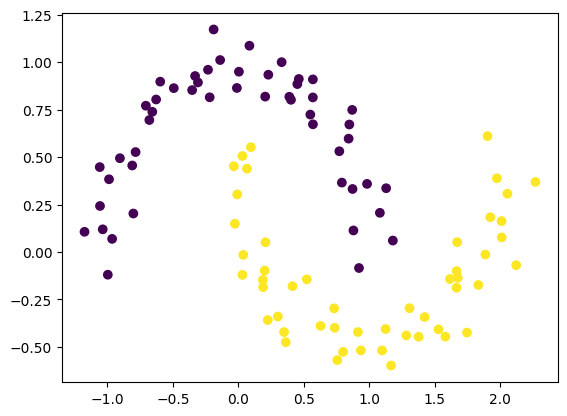

In [16]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

data = make_moons(n_samples=100, noise=0.1, random_state=42)

X = data[0]
y = data[1]

plt.scatter(X[:,0], X[:,1], c=y);

In [17]:
from sklearn.cluster import KMeans
import time

start_time = time.time()

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(ratings_normalized)

end_time = time.time()

print(f"KMeans время выполнения: {end_time - start_time:.4f} сек")

from collections import Counter
cluster_sizes = Counter(clusters)
print("Размеры кластеров:")
for cluster_id, size in cluster_sizes.items():
    print(f"Кластер {cluster_id}: {size} исполнителей")

KMeans время выполнения: 0.1121 сек
Размеры кластеров:
Кластер 3: 142 исполнителей
Кластер 4: 474 исполнителей
Кластер 1: 168 исполнителей
Кластер 0: 78 исполнителей
Кластер 2: 138 исполнителей


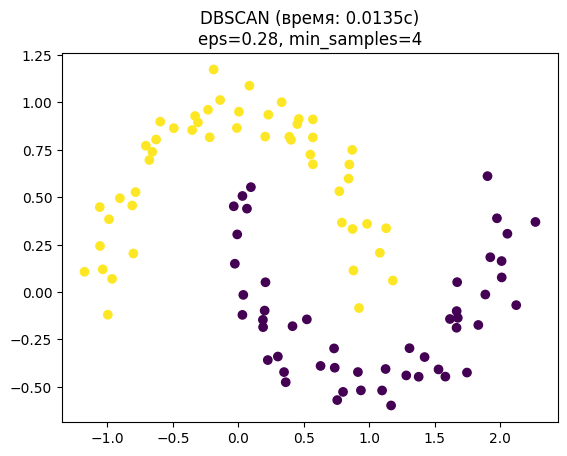

Время выполнения DBSCAN: 0.0135 секунд
Лучшие параметры: eps=0.28, min_samples=4
Качество: 1.0000


In [20]:
from sklearn.cluster import DBSCAN
import numpy as np

# Подбираем гиперпараметры
eps_values = [0.05, 0.1, 0.2, 0.28, 0.3, 0.32]
min_samples_values = [4, 5, 6, 7]
best_score = -1
best_labels = None
best_params = {}

start_time = time.time()

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)

        # Оцениваем качество (количество кластеров должно быть 2 и минимум шума)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters == 2:
            score = (len(X) - n_noise) / len(X)  # Процент точек не в шуме
            if score > best_score:
                best_score = score
                best_labels = labels
                best_params = {'eps': eps, 'min_samples': min_samples}

dbscan_time = time.time() - start_time

plt.scatter(X[:,0], X[:,1], c=best_labels)
plt.title(f'DBSCAN (время: {dbscan_time:.4f}с)\neps={best_params["eps"]}, min_samples={best_params["min_samples"]}')
plt.show()

print(f"Время выполнения DBSCAN: {dbscan_time:.4f} секунд")
print(f"Лучшие параметры: eps={best_params['eps']}, min_samples={best_params['min_samples']}")
print(f"Качество: {best_score:.4f}")

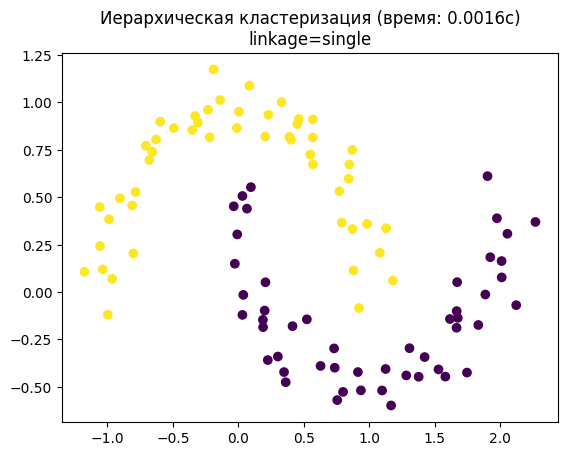

Время выполнения иерархической кластеризации: 0.0016 секунд
Лучший метод linkage: single
Качество: 0.2500


In [21]:
### Иерархическая кластеризация
from sklearn.cluster import AgglomerativeClustering

linkage_methods = ['ward', 'complete', 'average', 'single']
best_score = -1
best_labels = None
best_method = ''

start_time = time.time()

for linkage in linkage_methods:
    hierarchical = AgglomerativeClustering(n_clusters=2, linkage=linkage)
    labels = hierarchical.fit_predict(X)

    # Простая оценка качества (чем больше разделение, тем лучше)
    # Используем дисперсию меток как индикатор качества разделения
    score = np.var(labels)

    if score > best_score:
        best_score = score
        best_labels = labels
        best_method = linkage

hierarchical_time = time.time() - start_time

plt.scatter(X[:,0], X[:,1], c=best_labels)
plt.title(f'Иерархическая кластеризация (время: {hierarchical_time:.4f}с)\nlinkage={best_method}')
plt.show()

print(f"Время выполнения иерархической кластеризации: {hierarchical_time:.4f} секунд")
print(f"Лучший метод linkage: {best_method}")
print(f"Качество: {best_score:.4f}")

D:\Users\buriy\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Users\buriy\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Users\buriy\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
D:\Users\buriy\PycharmProjects\PythonProject\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


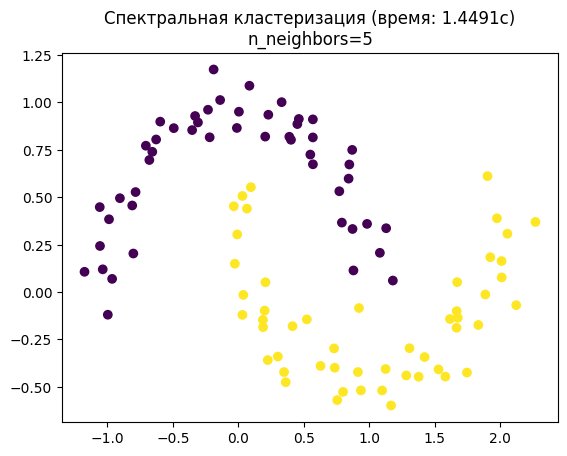

Время выполнения спектральной кластеризации: 1.4491 секунд
Лучший n_neighbors: 5
Качество: 0.2499


In [22]:
### Спектральная кластеризация
from sklearn.cluster import SpectralClustering

best_score = -1
best_labels = None
best_n_neighbors = 0

start_time = time.time()

for n_neighbors in range(1, 20):
    spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                                 n_neighbors=n_neighbors, random_state=42)
    labels = spectral.fit_predict(X)

    # Оцениваем качество
    score = np.var(labels)  # Дисперсия как индикатор качества разделения

    if score > best_score:
        best_score = score
        best_labels = labels
        best_n_neighbors = n_neighbors

spectral_time = time.time() - start_time

plt.scatter(X[:,0], X[:,1], c=best_labels)
plt.title(f'Спектральная кластеризация (время: {spectral_time:.4f}с)\nn_neighbors={best_n_neighbors}')
plt.show()

print(f"Время выполнения спектральной кластеризации: {spectral_time:.4f} секунд")
print(f"Лучший n_neighbors: {best_n_neighbors}")
print(f"Качество: {best_score:.4f}")